# Regression à variables muliples avec Numpy :
_https://machinelearnia.com/regression-lineaire-python/_


In [27]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. DataSet :

[[ 1.05445173 -1.07075262]
 [-0.36274117 -0.63432209]
 [-0.85409574  0.3130677 ]
 [ 1.3263859   0.29823817]
 [-0.4615846  -1.31590741]
 [ 1.94362119 -1.17312341]
 [-1.60205766  0.62523145]
 [-0.40178094  0.17742614]
 [-0.97727788  1.86755799]
 [ 0.37816252  0.15494743]]


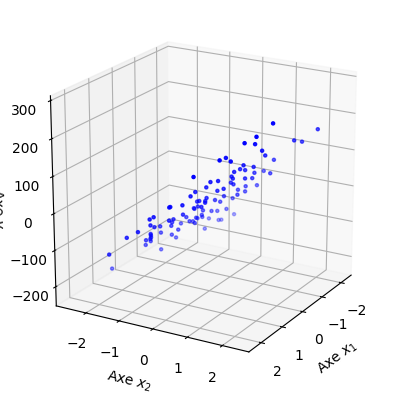

In [28]:
np.random.seed(0)
x,y = make_regression(n_samples = 100 , n_features = 2 , noise = 10)
print(x[:10])

# Créez une figure 3D
fig = plt.figure()

# Ajoutez un subplot 3D à la figure
ax = fig.add_subplot(111, projection='3d')

# Créez un nuage de points en 3D
ax.scatter(x[:,0], x[:,1], y, c='b', marker='.')  # c est la couleur, marker est le marqueur des points
ax.set_xlabel(r'Axe $x_1$')
ax.set_ylabel(r'Axe $x_2$')
ax.set_zlabel(r'Axe $y$')
# Contrôler l'aspect des axes
ax.set_box_aspect([1, 1, 1])  # Les trois valeurs correspondent à l'aspect des axes x, y et z
# Activer l'interactivité pour la rotation
ax.view_init(elev=20, azim=30)  # Paramètres d'élévation et d'azimut initiaux
# Affichez le graphique en 3D
plt.show()


On vérifie les dimensions de nos matrices générées :

In [29]:
print(x.shape) #return a tuple (ligne,column)
print(y.shape)
y = y.reshape(y.shape[0], 1) # il est vivement conseillé de redéfinir les dimensions de la matrice y
print(y.shape)

(100, 2)
(100,)
(100, 1)


**On construit une matrice 'X' qui sera la matrice 'x' avec la colonne de biais:**(on utilise l'horizontal stack de numpy pour coller les 2 matrices (respet de l'ordre d'insersion des matrices important) :

In [30]:
X = np.hstack((x,np.ones((x.shape[0],1))))

print(X.shape)
print(X[:10,:])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


**On définit le vecteur qui caractérise notre modèle linéaire y = ax+b :**


In [31]:
theta = np.random.randn(3,1) #on initialise le vecteur Theta par des valuers aléatoires :
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

## 2. Contruction du modèle linéaire : F=X.θ

In [32]:
def model (X, theta):
    return X.dot(theta)

In [33]:
model(X,theta)[:10] # on teste la fonction model pour voir si on n'a pas fait d'erreur

array([[-1.906574  ],
       [-0.39306659],
       [ 0.75597011],
       [-1.05774263],
       [-0.84588142],
       [-2.72171804],
       [ 1.61893306],
       [ 0.27577823],
       [ 2.07682005],
       [-0.38644272]])

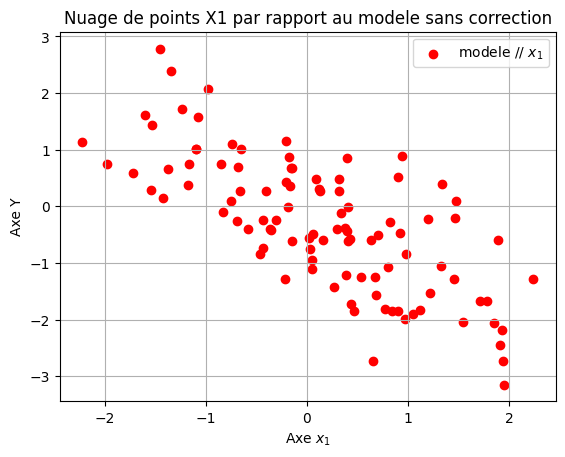

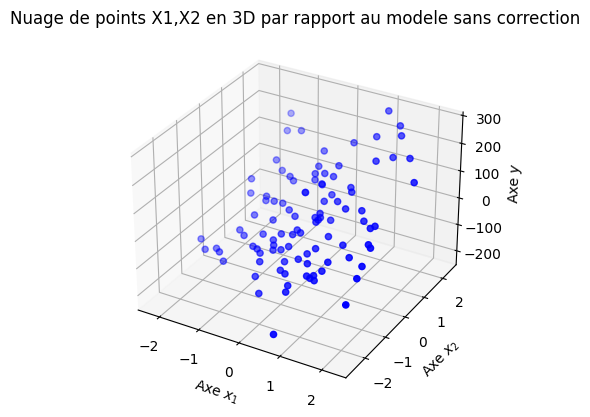

In [34]:
plt.scatter(x[:,0] , model(X,theta), color = 'r',label=r'modele // $x_1$')
plt.legend()

# Activez la grille
plt.grid()

# Ajoutez des étiquettes d'axe et un titre si nécessaire
plt.xlabel(r'Axe $x_1$')
plt.ylabel(r'Axe Y')
plt.title('Nuage de points X1 par rapport au modele sans correction')

# Créez une figure 3D
fig = plt.figure()

# Ajoutez un subplot 3D à la figure
ax = fig.add_subplot(111, projection='3d')

# Créez un nuage de points en 3D
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')  # c est la couleur, marker est le marqueur des points
ax.set_xlabel(r'Axe $x_1$')
ax.set_ylabel(r'Axe $x_2$')
ax.set_zlabel(r'Axe $y$')
plt.title('Nuage de points X1,X2 en 3D par rapport au modele sans correction')
# Affichez le graphique en 3D
plt.show()

==> la pente dépend du paramètre **a** choisi aléatoirement en haut.

## 3. La fonction Coût : (l'erreur quadratique moyenne)

In [35]:
def cost_function (X, y, theta) :
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y) **2)
    
    

In [36]:
cost_function(X,y,theta)

5294.071342926028

## 4. Gradients et Descente de gradients :

In [37]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)
    

In [38]:
def gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000):  #parametres par defaut  0.01 et 1000

    cost_history = np.zeros(n_iterations)#  pour la courbe d'apprentissage
    for i in range (0,n_iterations) :
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X,y,theta)
        
    return theta, cost_history , n_iterations
    

## 5. Machine Leaning :


In [39]:
theta_final, cost_history,n_iterations = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000) #passage d'arguments

In [40]:
print(theta_final)

[[28.67154616]
 [97.29524926]
 [-0.511481  ]]


In [41]:
predictions = model(X,theta_final)

C:\Users\choua\AppData\Local\Temp\ipykernel_4780\360862131.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


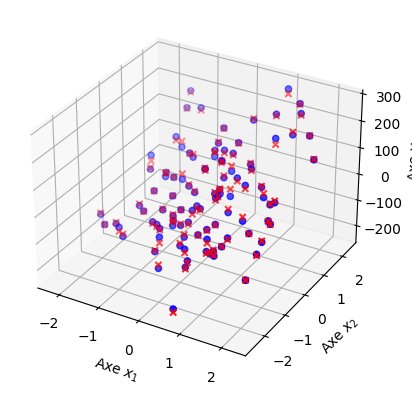

In [42]:
#Comparaison du modèle avec le dataset :

# Créez une figure 3D
fig = plt.figure()

# Ajoutez un subplot 3D à la figure
ax = fig.add_subplot(111, projection='3d')

# Créez un nuage de points en 3D
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')  # c est la couleur, marker est le marqueur des points
ax.scatter(x[:,0], x[:,1], predictions, c='r', marker='x')
ax.set_xlabel(r'Axe $x_1$')
ax.set_ylabel(r'Axe $x_2$')
ax.set_zlabel(r'Axe $y$')

# Affichez le graphique en 3D

fig.show()

In [43]:
print(f"le modèle final est y = {str(theta_final[0])}*" + "x1" + f"{str(theta_final[1])}*" + f"x2" + f"{theta_final[2]}")

le modèle final est y = [28.67154616]*x1[97.29524926]*x2[-0.511481]


## 5.1 Courbe d'apprentissage :


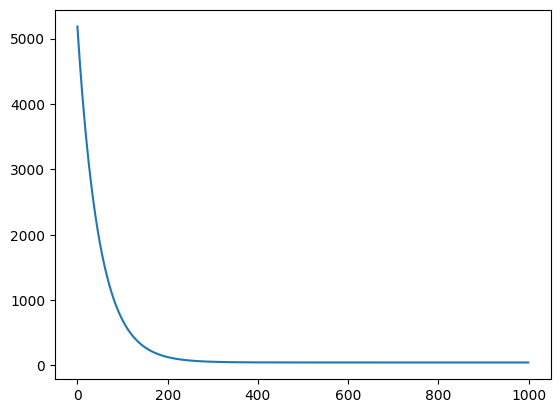

In [44]:
plt.plot(np.arange(n_iterations), cost_history) #il faut que les 2 variable aient la même dimension

## 5.2 Coefficient de determination :

![Alt text](image.png)

En bref :

![Alt text](image-1.png)

In [45]:
def coef_determination (y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return f"{round((1 - u/v)*100),2}%"

In [46]:
coef_determination (y, predictions)

'(99, 2)%'